# Student Housing Matchmaker Progress Report
CS 418 Spring 2025

# Project Introduction

# Any changes since the proposal


1. The data for colleges was updated to just handle Chicago colleges. Originally the data included all colleges within Illinois, but was cleaned to soley just include Chicago colleges. This left us with only 70 Chicago colleges to work with.
2. Completed and found the datasets that were needed. During our proposal the CTA datasets were missing. Since then the CTA bus routes and CTA train routes are now included for our project.
3. Many datasets were filtered during data wrangling to contain just the neccessary columns needed. Made the decision to change NaN values found within the Chicago Rentals dataset to 1.0 within baths column as each address contained at least 1 bathroom.
4. Any TRUE/FALSE values found within CTA train routes dataset and changed to type int (1/0).

# Data

**Colleges dataset**: The data for colleges was updated to just handle Chicago colleges. Originally the data included all colleges within Illinois, but was cleaned to soley just include Chicago colleges. This left us with only 70 Chicago colleges to work with. After filtering to just include Chicago colleges, the dataset was cleaned to just include the important columns needed for our project, which is just to include Name and Address of the Chicago college. (chicago_colleges_df)

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
il_colleges_df = pd.read_csv("CollegeNavigator_Search_2025-03-03.csv")
print(f"Original database containing total Illinois Universities: {len(il_colleges_df)}")

Original database containing total Illinois Universities: 249


In [18]:
chicago_colleges_df = il_colleges_df[il_colleges_df['Address'].str.contains('Chicago', case=False, na=False)]
chicago_colleges_df = chicago_colleges_df[['Name', 'Address']].reset_index(drop=True)
chicago_colleges_df

,Name,Address
0,Adler University,"17 North Dearborn Street, Chicago, Illinois 60602"
1,American Academy of Art College,"332 S Michigan Ave, Chicago, Illinois 60604-4302"
2,American Islamic College,"640 W Irving Park RD, Chicago, Illinois 60613"
3,Aveda Institute-Chicago,"2828 N Clark St, Chicago, Illinois 60657"
4,Aviation Institute of Maintenance-Chicago,"3711 South Ashland Avenue, Chicago, Illinois 6..."
...,...,...
65,University of Illinois Chicago,"601 S Morgan, Chicago, Illinois 60607"
66,University of Notre Dame -,"224 South Michigan Avenue, Chicago, Illinois 6..."
67,VanderCook College of Music,"3140 South Federal Street, Chicago, Illinois 6..."
68,Prairie State College,"202 South Halsted Street, Chicago Heights, Ill..."


In [22]:
print(f"Updated/Cleaned database containing total Chicago universities: {len(chicago_colleges_df)}")

Updated/Cleaned database containing total Chicago universities: 70


********************************************************************************************************************************************************
**Chicago Rentals dataset**: The data for rentals was updated to include important columns like ['Price', 'Address', 'Listing URL', 'Short Address', 'Zip', 'Beds', 'Baths', 'Raw Property Details', 'Latitude', 'Longitude']. Then updated NaN values for Baths to 1.0. Noticed there were some undisclosed addresses. Since our goal is to provide students with apartment details, these were removed after noticing there were 70 rows that contained 'undisclosed Address'. Made sure baths and beds were in floats to maintain readability. Prices were converted from string to float in order to be able to make proper calculatios. (chicago_rentals_df)

In [195]:
chicago_rentals_df = pd.read_csv("Zillow Rental (Chicago Area 03_03_2025).csv")
chicago_rentals_df = chicago_rentals_df[['Price', 'Address', 'Listing URL', 'Short Address', 'Zip', 'Beds', 'Baths', 'Raw Property Details', 'Latitude', 'Longitude']].reset_index(drop=True)

In [197]:
# Keep Beds and Baths as floats, cleaned NaN baths
chicago_rentals_df['Baths'] = chicago_rentals_df['Baths'].fillna(1)
chicago_rentals_df['Beds'] = chicago_rentals_df['Beds'].astype(float)

In [199]:
# Check how many undisclosed addresses within dataset
undisclosed_count = chicago_rentals_df[chicago_rentals_df['Short Address'] == '(undisclosed Address)'].shape[0]
print(f"Undisclosed address count: {undisclosed_count}")

Undisclosed address count: 70


In [201]:
# Dropped undisclosed Address from database so left with 2731 rows.
chicago_rentals_df = chicago_rentals_df[chicago_rentals_df['Short Address'] != '(undisclosed Address)'].reset_index(drop=True)

# Cleaned Price column to show as type int
chicago_rentals_df['Price'] = (
    chicago_rentals_df['Price']
    .str.replace('$', '', regex=False)
    .str.replace(',', '', regex=False)
    .str.strip()
)

chicago_rentals_df['Price'] = pd.to_numeric(chicago_rentals_df['Price'], errors='coerce')
chicago_rentals_df['Price'] = chicago_rentals_df['Price'].astype(float)

chicago_rentals_df

,Price,Address,Listing URL,Short Address,Zip,Beds,Baths,Raw Property Details,Latitude,Longitude
0,532.0,"4713 N Western Ave, Chicago, IL 60625",https://zillow.com//apartments/chicago-il/canv...,4713 N Western Ave # 302,60625,0.0,1.0,Studio,41.967130,-87.688545
1,600.0,"6340 S Eberhart Ave #1, Chicago, IL 60637",https://www.zillow.com/homedetails/6340-S-Eber...,6340 S Eberhart Ave #1,60637,3.0,1.0,3 bds | 1 ba | 1000 sqft,41.779083,-87.613525
2,639.0,"Ferdinand, 5412 W Ferdinand St, Chicago, IL 60644",https://www.zillow.com/apartments/chicago-il/f...,5412 W Ferdinand St #573B2222C,60644,0.0,1.0,Studio | 1 ba | 400 sqft,41.889187,-87.761024
3,650.0,"6115 S Drexel Ave #1, Chicago, IL 60637",https://www.zillow.com/homedetails/6115-S-Drex...,6115 S Drexel Ave #1,60637,1.0,1.0,1 bds | 1 ba,41.783596,-87.603920
4,650.0,"158 N Central Ave, Chicago, IL 60644",https://www.zillow.com/homedetails/158-N-Centr...,158 N Central Ave,60644,0.0,1.0,Studio | 1 ba,41.883904,-87.765465
...,...,...,...,...,...,...,...,...,...,...
2726,1750.0,"4056 N Leamington Ave #2R, Chicago, IL 60641",https://www.zillow.com/homedetails/4056-N-Leam...,4056 N Leamington Ave #2R,60641,1.0,1.0,1 bds | 1 ba | 900 sqft,41.954990,-87.756325
2727,1750.0,"3903 W Belden Ave #2, Chicago, IL 60647",https://www.zillow.com/homedetails/3903-W-Beld...,3903 W Belden Ave #2,60647,2.0,1.0,2 bds | 1 ba | 700 sqft,41.922546,-87.724594
2728,1750.0,"5123 S Indiana Ave #3, Chicago, IL 60615",https://www.zillow.com/homedetails/5123-S-Indi...,5123 S Indiana Ave #3,60615,3.0,1.0,3 bds | 1 ba | 1500 sqft,41.801254,-87.620570
2729,1750.0,"2653 N Harding Ave, Chicago, IL 60647",https://www.zillow.com/homedetails/2653-N-Hard...,2653 N Harding Ave,60647,2.0,1.0,2 bds | 1 ba,41.929714,-87.725480


********************************************************************************************************************************************************
**Divvy Bicycle Stations dataset**: A dataset of the stations where one can pick up and return bicycles from the Divvy bicycle sharing system. Contains only the columns necessary ['Station Name', 'Latitude', 'Longitude', 'Location']. (divvy_stations_df)

In [32]:
divvy_stations_df = pd.read_csv("Divvy_Bicycle_Stations_20250405.csv")
divvy_stations_df = divvy_stations_df[['Station Name', 'Latitude', 'Longitude', 'Location']]
divvy_stations_df

,Station Name,Latitude,Longitude,Location
0,Damen Ave & Charleston St,41.920082,-87.677855,POINT (-87.677855 41.920082)
1,Laramie Ave & Kinzie St,41.887832,-87.755527,POINT (-87.755527 41.887832)
2,Warren Park West,42.001785,-87.688829,POINT (-87.688829 42.001785)
3,Lockwood Ave & Wrightwood Ave,41.927766,-87.758544,POINT (-87.758544 41.927766)
4,California Ave & Cortez St,41.900363,-87.696704,POINT (-87.696704 41.900363)
...,...,...,...,...
1044,Damen Ave & Chicago Ave,41.895687,-87.677135,POINT (-87.677135082864 41.895687370534)
1045,Morgan St & Lake St*,41.885492,-87.652289,POINT (-87.652289271355 41.885491706269)
1046,Major Taylor Trail & 115th St,41.684932,-87.645289,POINT (-87.645288705826 41.684931595193)
1047,Sedgwick St & Schiller St,41.907626,-87.638566,POINT (-87.638566 41.907626)


********************************************************************************************************************************************************
**CTA Bus Routes dataset**: MultiLineString containing (longitude, latitude) bus routes. Contains columns like [['the_geom', 'ROUTE', 'NAME']] for each bus route. 'the_geom' contain the MultiLineString bus route (longitude, latitude). (bus_routes_df)

In [34]:
bus_routes_df = pd.read_csv("CTA_-_Bus_Routes.csv")
bus_routes_df = bus_routes_df[['the_geom', 'ROUTE', 'NAME']]
bus_routes_df

,the_geom,ROUTE,NAME
0,MULTILINESTRING ((-87.75480000023407 41.872929...,57,LARAMIE
1,MULTILINESTRING ((-87.59423000074659 41.707640...,106,EAST 103RD
2,MULTILINESTRING ((-87.6392400000517 41.8672499...,192,U OF CHICAGO HOSPITALS EXPRESS
3,MULTILINESTRING ((-87.74620000001498 41.749049...,2,HYDE PARK EXPRESS
4,MULTILINESTRING ((-87.64790999981973 41.867129...,12,ROOSEVELT
...,...,...,...
122,MULTILINESTRING ((-87.62449999918586 41.888329...,120,OGILVIE/STREETERVILLE EXPRESS
123,MULTILINESTRING ((-87.77390000023009 41.876470...,126,JACKSON
124,MULTILINESTRING ((-87.77390694614428 41.880080...,20,MADISON
125,MULTILINESTRING ((-87.61698999997792 41.865019...,128,SOLDIER FIELD EXPRESS


********************************************************************************************************************************************************
**CTA Train Routes dataset**: This list of 'L' stops provides location and basic service availability information for each place on the CTA system where a train stops, along with formal station names and stop descriptions. (train_routes_filtered)

In [36]:
train_routes_df = pd.read_csv("CTA_-_System_Information_-_List_of__L__Stops_20250405.csv")

# Convert to type int
cols_to_convert = ['ADA', 'RED', 'BLUE', 'G', 'BRN', 'P', 'Pexp', 'Y', 'Pnk', 'O']
train_routes_df[cols_to_convert] = train_routes_df[cols_to_convert].astype(int)

# Dropped STOP_ID and MAP_ID
train_routes_filtered = train_routes_df.drop(columns=['STOP_ID', 'MAP_ID'])
train_routes_filtered.head()

,DIRECTION_ID,STOP_NAME,STATION_NAME,STATION_DESCRIPTIVE_NAME,ADA,RED,BLUE,G,BRN,P,Pexp,Y,Pnk,O,Location
0,E,Cicero (Loop-bound),Cicero,Cicero (Pink Line),1,0,0,0,0,0,0,0,1,0,"(41.85182, -87.745336)"
1,E,Central Park (Loop-bound),Central Park,Central Park (Pink Line),1,0,0,0,0,0,0,0,1,0,"(41.853839, -87.714842)"
2,W,Halsted/63rd (Ashland-bound),Halsted,Halsted (Green Line),1,0,0,1,0,0,0,0,0,0,"(41.778943, -87.644244)"
3,N,Cumberland (O'Hare-bound),Cumberland,Cumberland (Blue Line),1,0,1,0,0,0,0,0,0,0,"(41.984246, -87.838028)"
4,E,Racine (O'Hare-bound),Racine,Racine (Blue Line),0,0,1,0,0,0,0,0,0,0,"(41.87592, -87.659458)"


# Exploratory Data Analysis

**What are the price distributions for available rentals in Chicago?** Most rental listings in the rental dataset fall between 1475 and 1650, which is shown below by looking at the tallest bars. This means that most rentals that are available in Chicago are at the upper end of a typical student's budget. The rental market at the moment heavily favors listings above $1200. This means that low cost options may be limited or harder to find. For higher priced rentals, a student may consider splitting the cost with roomates.

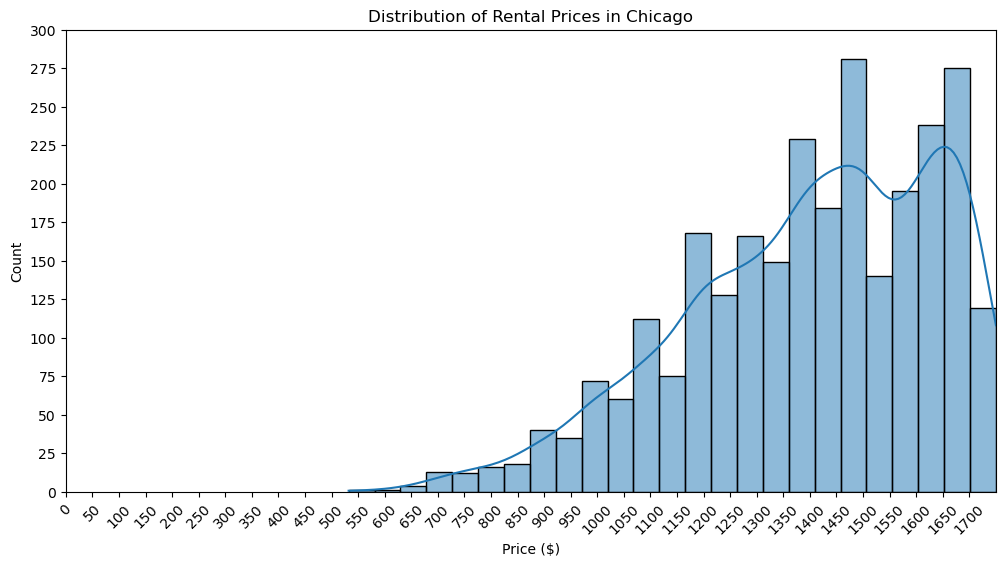

In [262]:
plt.figure(figsize=(12, 6))
sns.histplot(chicago_rentals_df['Price'], kde=True)
plt.title("Distribution of Rental Prices in Chicago")
plt.xlabel("Price ($)")
plt.ylabel("Count")        # How many listings fall within $ range

plt.yticks(ticks=np.arange(0, 325, 25))

plt.xlim(0, 1750)
plt.xticks(ticks=np.arange(0, 1750, 50), rotation=45)

plt.show()

In [216]:
min_price = chicago_rentals_df['Price'].min()
max_price = chicago_rentals_df['Price'].max()

print(f"Min Price: ${min_price}")
print(f"Max Price: ${max_price}")

Min Price: $532.0
Max Price: $1750.0


**What are the common bed listings?** Most common bed count in Chicago rentals are 1 and 2. There is also an increase of 0 bed count which means that the Chicago rental dataset contains about 600 studio apartments.

Text(0, 0.5, 'Count')

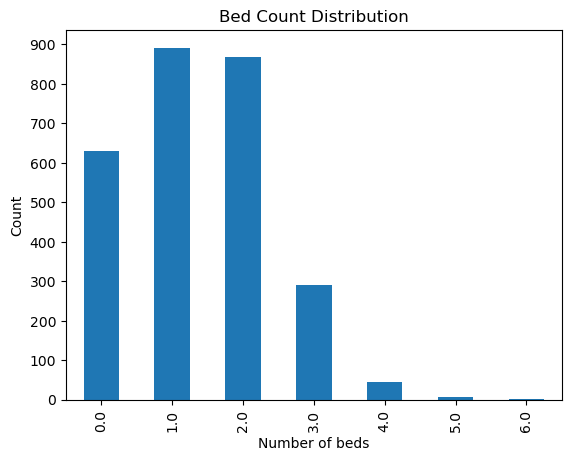

In [307]:
chicago_rentals_df['Beds'].value_counts().sort_index().plot(
    kind='bar',
    title='Bed Count Distribution'
)

plt.yticks(ticks=np.arange(0, 1000, 100))

plt.xlabel("Number of beds")
plt.ylabel("Count")

In [311]:
bed_counts = chicago_rentals_df['Beds'].value_counts().sort_index()
bed_counts_df = bed_counts.reset_index()
bed_counts_df.columns = ['Number of Beds', 'Count']
display(bed_counts_df)

,Number of Beds,Count
0,0.0,630
1,1.0,892
2,2.0,868
3,3.0,290
4,4.0,44
5,5.0,6
6,6.0,1


In [316]:
# This proves that it is true the dataset contains 630 studio apartments.
studio_count = chicago_rentals_df['Raw Property Details'].str.contains('studio', case=False, na=False).sum()
print(f"Number of studio apartments: {studio_count}")

Number of studio apartments: 630


# Visualizations

Hypothesis: Rental prices in Chicago increase with the number of bedrooms in an apartment. (Cristal Martinez)

When looking at the median price, it rises as the bed count increases, especially between 0 (studio), 1, 2, and 3 beds. Larger apartments tend to be more expensive, and there are fewer low priced options as the amount of bedrooms increase.

Studio apartments have a wider price range when looking at the graph below. Rents for studios span from 500 up to $1750. This suggests that 1–3 bed units are most common. Outliers exists within 2 bed and 3 bed listings and shows that there are some listing that are cheaper than typical.

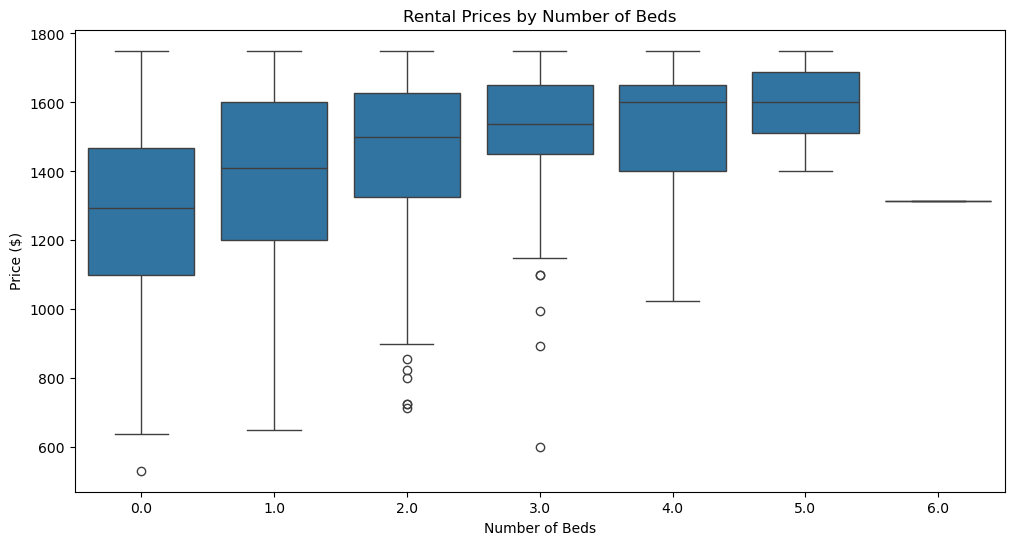

In [318]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Beds', y='Price', data=chicago_rentals_df)

plt.title("Rental Prices by Number of Beds")
plt.xlabel("Number of Beds")
plt.ylabel("Price ($)")
plt.show()

# ML Analyses


# Reflection